<h1>Finding the correlation between variables</h1>
<br /><br />

**Used `Python (Pandas, NumPy)` and other necessry/famous libraries to undertand & explore correlations between different variables of a dataset.**

**Correlations are identified, and highlighted using `graphs`.**

**I've used a `publicly available dataset` to perform data analysis operations.**

The dataset contains various laptop models, their specifications and prices. I'll explore correlation between those factors (specifications) of laptops which are affecting/increasing the price.


**If you are interested to know what most of the following code lines mean, don't miss reading the comment lines starting with hash `#`**

Here you go ...

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Connecting pandas to the required dataset
laptop_info = pd.read_csv("Datasets/laptop_pricing.csv")

# Preventing 'NaN' values to appear here
laptop_info = laptop_info.fillna('')

# To view top 5 rows of the dataset
laptop_info.head()

,Laptop,Status,Brand,Model,CUP,RAM,Storage,Storage_Type,GPU,Screen,Touch,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,,15.6,No,669.01


In [2]:

# Checking data types of all fields in the selected dataset

laptop_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        100 non-null    object 
 1   Status        100 non-null    object 
 2   Brand         100 non-null    object 
 3   Model         100 non-null    object 
 4   CUP           100 non-null    object 
 5   RAM           100 non-null    int64  
 6   Storage       100 non-null    int64  
 7   Storage_Type  100 non-null    object 
 8   GPU           100 non-null    object 
 9   Screen        100 non-null    float64
 10  Touch         100 non-null    object 
 11  Price         100 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 9.5+ KB


In [3]:

# Finding correlation betweent different variables of the dataset (rounding decimal values to 2)

correlation = laptop_info.corr(numeric_only = True).round(2)

correlation

,RAM,Storage,Screen,Price
RAM,1.00,0.72,0.36,0.81
Storage,0.72,1.00,0.29,0.73
Screen,0.36,0.29,1.00,0.18
Price,0.81,0.73,0.18,1.00


**The matrix above is showing the correlation values of differenct `numeric` variables (factors affecting price in this case). The higher value means, the higher is the correlation. However, for each variable, its own value will always be `1` (which is irrelevant and is not considered during analysis).**

Following three variables from the above matrix will be considered for correlation (affecting the 'Price' variable):

1. RAM
2. Storage
3. Screen

In [4]:

#Narrowing correlation factors, excluding the 'Price' variable

correlation_by_price = correlation['Price'][0:3]

correlation_by_price

RAM        0.81
Storage    0.73
Screen     0.18
Name: Price, dtype: float64

**The analysis shows that the variabe `RAM` is the affecting the price the most, since its value is highest (closer to `1`)**.

**The second factor/variable affecting on laptop price is `Storage`**.

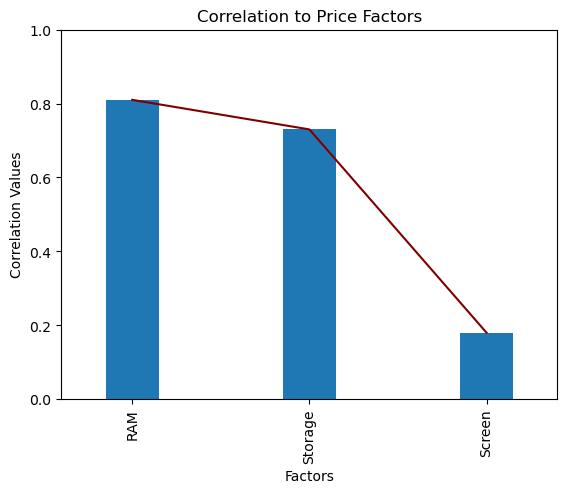

In [5]:

# Plotting the graph, showing which variables are affecting the price the most
# The graph shows that the higher the RAM of a laptop, the heigher will be the price

correlation_by_price.plot.line(color='maroon')
correlation_by_price.plot.bar(width=0.3)

plt.ylabel("Correlation Values")
plt.xlabel("Factors")
plt.title("Correlation to Price Factors")
plt.ylim(0, 1)

plt.show()

**The above `bar` and `line` graphs combined, are showing the variables with highest correlational values**


**Notice the following variables:**
<br />

<img src="Fig-1.jpg" width='800' />


<Axes: >

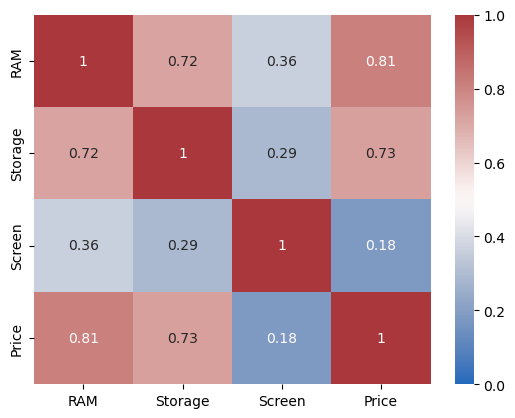

In [6]:

# Plotting a heatmap to check correlation between the factors affecting the Price

sns.heatmap(correlation, annot=True, vmin=0, vmax=1, cmap="vlag")

**Again - the matrix above makes it easy to visualize the variables `RAM` and `Storage` are highly correlated with the `Price`.**

**See the illustration below where variables with highest correlations are highlighted:**
<br />

<img src="Fig-2.jpg" width='800' />

In [7]:

# Using NumPy masking technique to get True & False values as correlation

masking = np.triu(np.ones_like(correlation, dtype=bool))

masking

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [8]:

# Now masking the redundant values, so that the focus remains only on the varibales actually affecting the Price variables

sns.heatmap(corelation, annot=True, vmin=0, vmax=1, cmap='vlag', mask=masking)

NameError: name 'corelation' is not defined